# Projet : implémentation d'un jeu

- L'objectif est d'implémenter un jeu sous la forme de plusieurs classes : 
    - Une classe qui gère le jeu
    - Une classe représentant un / des joueur(s) humains
    - Une classe par IA
    
    
    
**Jeux**

- Bataille navale
- Pendu
- Morpion



**Implémentation**

- Coder un programme qui permet : 
    - 1. A un utilisateur de jouer à ce jeu 
    - 2. A une IA de jouer au hasard (IaRandom)
    - 3. A une IA de jouer (IaDumb)
    - 4. A une IA de jouer "intelligement" (IaSmart)
    
**Toutes les IA doivent avoir les mêmes méthodes !**

- Ensuite, coder un programme qui permet :
    - 5. De simuler 1000 partie avec l'une des IA codées précédemment (ou deux IA l'une contre l'autre, mais différente)
    - 6. De calculer le pourcentage de parties gagnées par chaque IA
    
    
**Rendu**
- Vous rendez un fichier notebook avant la date indiquée sur Google Classroom (ie lundi 31 octobre à 17h)
    
    
**Exemple**
- Vous pouvez vous inspirez du code MontyHall ci-dessous

In [1]:
import numpy as np
import random

class Ia:
    """Parent class for all AIs"""
    def __init__(self):
        self.first_choice = None
    
    def make_first_choice(self, choices):
        """Random first choice"""
        self.first_choice = random.choice(choices)
        return self.first_choice
    
    def make_second_choice(self, choices):
        pass
    
    
class IaSmart(Ia):
    """This IA always changes its choice"""
    def __init__(self):
        super().__init__()

    def make_second_choice(self, choices):
        """Change its choice"""
        return [choice for choice in choices if choice != self.first_choice][0]
    
    
class IaDumb(Ia):
    """This IA always keeps its choice"""
    def __init__(self):
        super().__init__()
    
    def make_second_choice(self, choices):
        """Same than first choice"""
        return self.first_choice
    
    
class IaRandom:
    """This IA plays randomly"""
    def __init__(self):
        pass
    
    def make_first_choice(self, choices):
        """Random first choice"""
        self.first_choice = random.choice(choices)
        return self.first_choice
    
    def make_second_choice(self, choices):
        """Change its choice"""
        return random.choice([choice for choice in choices if choice != self.first_choice])
    
    
    
class MontyGame: 
    def __init__(self, player, n_games=1):
        self.score = 0 
        self.player = player
        self.n_games = n_games
        
        self.all_doors = ["1", "2", "3"]
        
        self.correct_door = None
        self.excluded_door = None
        self.second_choice_doors = None
        
    def exclude_one_not_correct_door(self):
        """Exclude one of the not selected door"""
        np.random.shuffle(self.all_doors)
        self.excluded_door = [door for door in self.all_doors if ((door != self.correct_door) and (door != self.first_choice))][0]
        self.second_choice_doors = [door for door in self.all_doors if door != self.excluded_door]
        return self.second_choice_doors
        
    def start(self):
        """Initialize by picking randomly the correct door"""
        self.correct_door = random.choice(self.all_doors)
        
    def play_one(self):
        """Run one game"""
        # We choosed a door
        self.start()
        
        # First choice
        self.first_choice = self.player.make_first_choice(self.all_doors)
        
        # Exclude an incorrect door
        self.exclude_one_not_correct_door()
        # Second choice
        self.second_choice = self.player.make_second_choice(self.second_choice_doors)
        # If second choice is correct => score increases
        if self.second_choice == self.correct_door:
            self.score += 1
        else:
            pass
             
    def play_many(self):
        for _ in range(self.n_games):
            self.play_one()

# IA Random

In [2]:
player = IaRandom()
game = MontyGame(player=player, n_games=2)
game.play_many()
game.score

2

# Ia Dumb

In [3]:
player = IaDumb()
game = MontyGame(player=player, n_games=2)
game.play_many()
game.score

1

# IA Smart

In [4]:
player = IaSmart()
game = MontyGame(player=player, n_games=2)
game.play_many()
game.score

0

# % de parties gagnées

In [5]:
N_PARTIES = 1000

for Ia in [IaSmart, IaDumb, IaRandom]:
    player = Ia()
    game = MontyGame(player=player, n_games=N_PARTIES)
    game.play_many()
    score = game.score
    score_in_percent = score / N_PARTIES
    print(f"{score} parties gagnées sur un total de {N_PARTIES} - {'{:.2f}'.format(score_in_percent)}")
    print("\n")

662 parties gagnées sur un total de 1000 - 0.66


331 parties gagnées sur un total de 1000 - 0.33


647 parties gagnées sur un total de 1000 - 0.65




# Graphs

{'IaSmart': [1.0, 1.0, 0.3333333333333333, 1.0, 1.0, 1.0, 0.8571428571428571, 0.625, 0.7777777777777778, 0.6, 0.5454545454545454, 0.6666666666666666, 0.6153846153846154, 0.7142857142857143, 0.7333333333333333, 0.75, 0.6470588235294118, 0.8333333333333334, 0.7368421052631579, 0.7, 0.6190476190476191, 0.8181818181818182, 0.7391304347826086, 0.4583333333333333, 0.76, 0.5384615384615384, 0.6666666666666666, 0.6071428571428571, 0.7586206896551724, 0.6666666666666666, 0.7096774193548387, 0.75, 0.7272727272727273, 0.6176470588235294, 0.5714285714285714, 0.6944444444444444, 0.6486486486486487, 0.6842105263157895, 0.6410256410256411, 0.825, 0.5609756097560976, 0.5238095238095238, 0.6976744186046512, 0.6136363636363636, 0.5777777777777777, 0.5, 0.6170212765957447, 0.5625, 0.5918367346938775, 0.68, 0.5882352941176471, 0.75, 0.6226415094339622, 0.6666666666666666, 0.6181818181818182, 0.6785714285714286, 0.7719298245614035, 0.5689655172413793, 0.6101694915254238, 0.65, 0.6721311475409836, 0.7419354

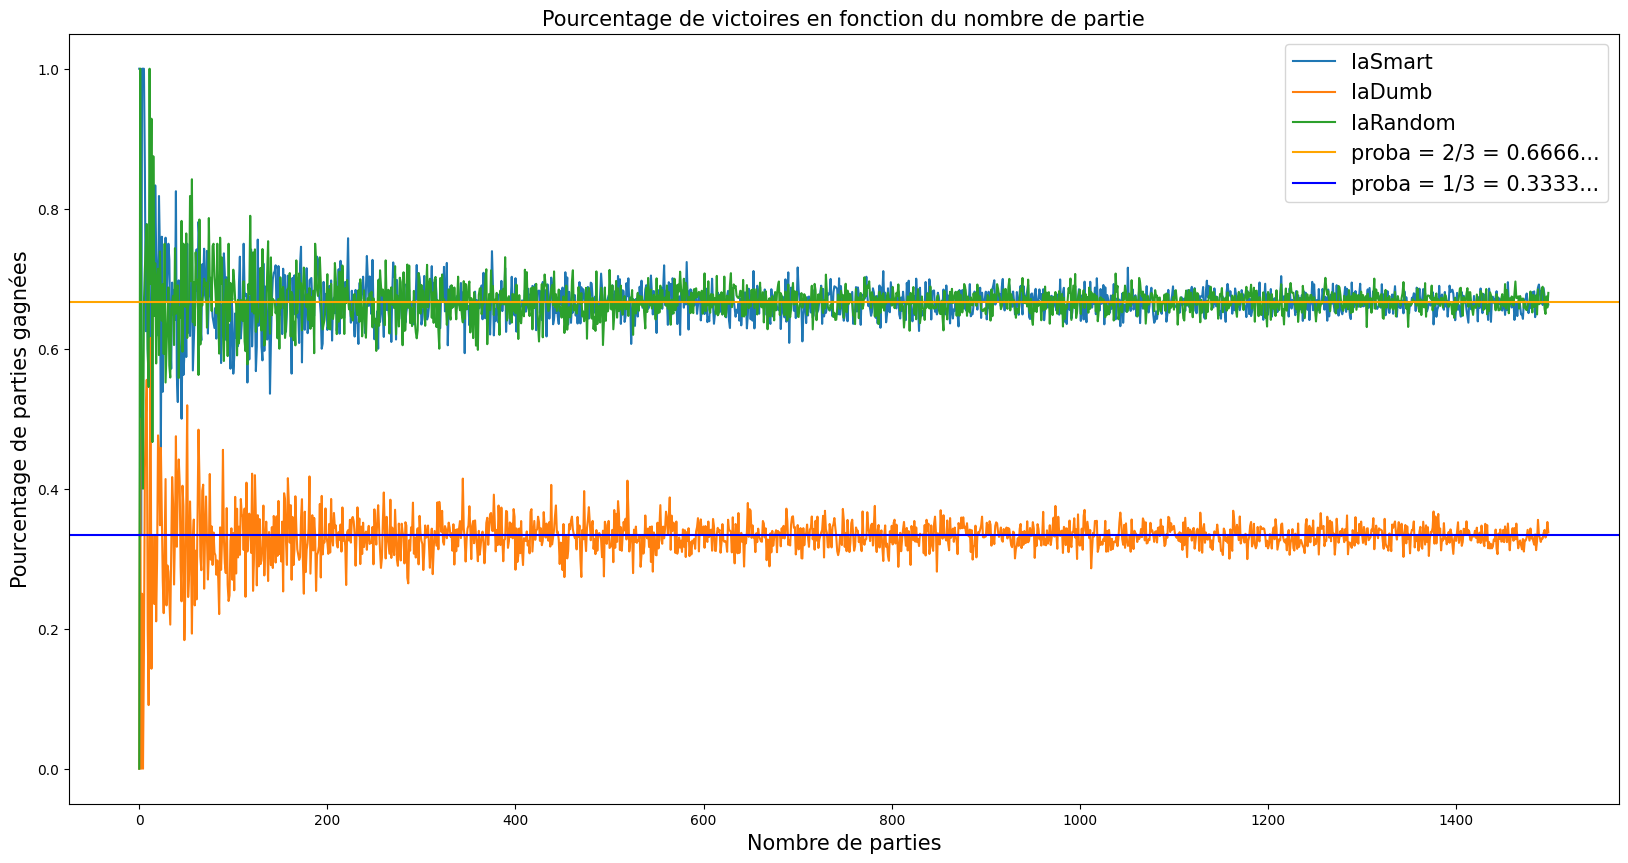

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

stats_ia = {"IaSmart": [], "IaDumb": [], "IaRandom": []}


for N_PARTIES in range(1, 1500):
    for Ia, ia_name in zip([IaSmart, IaDumb, IaRandom], ["IaSmart", "IaDumb", "IaRandom"]):
        player = Ia()
        game = MontyGame(player=player, n_games=N_PARTIES)
        game.play_many()
        score = game.score
        score_in_percent = score / N_PARTIES
        stats_ia[ia_name].append(score_in_percent)

print(stats_ia)
        
        
df = pd.DataFrame.from_dict(stats_ia, orient='index').T
df.plot(figsize=(20,10))
plt.axhline(2/3, color='orange', label="proba = 2/3 = 0.6666...")
plt.axhline(1/3, color='blue', label="proba = 1/3 = 0.3333...")
plt.legend(fontsize=15)
plt.title("Pourcentage de victoires en fonction du nombre de partie", fontsize=15)
plt.xlabel("Nombre de parties", fontsize=15)
plt.ylabel("Pourcentage de parties gagnées", fontsize=15)
plt.show()